In [1]:
# Import Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor

In [2]:
# Load the data
df = pd.read_csv('housingdata.csv')

# Display top 5 rows of dataset
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


---

### Exploratory Data Analysis and Data Cleaning

In [3]:
# Shape of data(No.of rows and cols)
df.shape

(506, 14)

In [4]:
# Information and Data Types of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [5]:
# Data Distribution Summary
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
# Check Missing Values
df.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

CRIM, ZN, INDUS, CHAS, AGE, and LSTATE have missing values

In [7]:
# Fill missing values with 'Mean' strategy
df = df.fillna(df.mean())
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Missing Values have been filled

In [8]:
# Check Duplicate Rows
df.duplicated().sum()

np.int64(0)

No Duplicate Rows found

---

#### Outliers Identification and Removal

**Outlier:** An outlier is a data point that is significantly different from other observations in a dataset. It is located far off from the majority of the data and can be present in either the features (independent variables) or the target variable (dependent variable).

Preventing skewed metrics, misleading patterns, and poor model performance requires outlier handling, particularly in regression models where they can disproportionately affect coefficients. Model robustness, generalization, and data integrity can be improved by properly handling errors or rare anomalies.

---

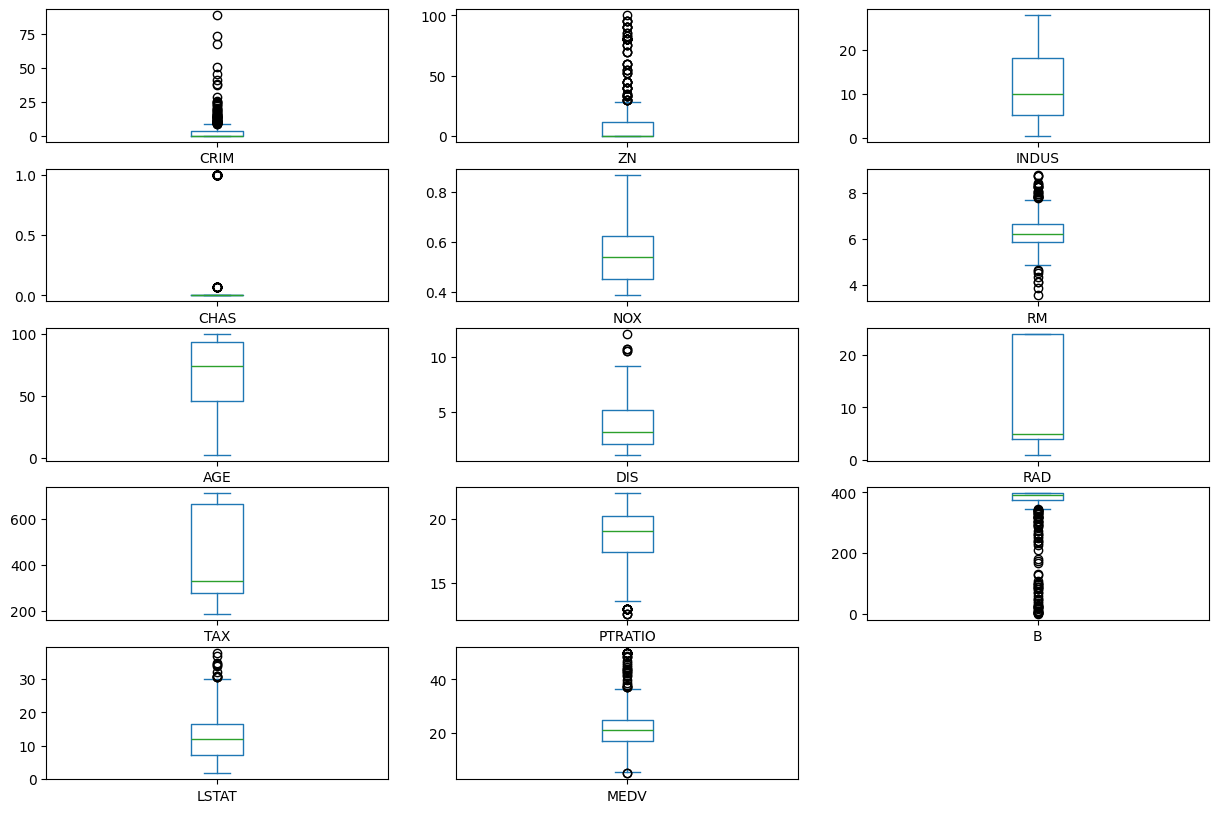

In [9]:
# Box Plot to visualize Outliers
df.plot(kind='box', subplots=True, layout=(5,3), figsize=(15,10))
plt.show()


INDUS, NOX, AGE, TAX, RAD columns have no outlier, while CHAS column has few outliers. I would not remove the outliers from the target column, as the information can be important.

In [10]:
# Exclude Columns where outlier removal is not required

columns_to_exclude = ['INDUS', 'NOX', 'AGE', 'RAD', 'TAX', 'MEDV', 'CHAS']
numeric_cols = df.select_dtypes(include=[np.number]).columns
numeric_cols = numeric_cols[~numeric_cols.isin(columns_to_exclude)]

**InterQuartile Range:** The IQR measures the spread of the middle 50% of the data, calculated as:

IQR=Q3−Q1

Where Q1 is the first quartile (25th percentile) and Q3 is the third quartile (75th percentile). It is used to detect and handle outliers by defining bounds:

Lower Bound=Q1−1.5×IQR, Upper Bound=Q3+1.5×IQR

---

**Clipping:** Clipping adjusts extreme values (outliers) to fall within defined bounds:

Values below the lower bound are set to the lower bound.
Values above the upper bound are set to the upper bound.

In [11]:
for column in numeric_cols:
    Q1 = df[column].quantile(0.25)  # First quartile
    Q3 = df[column].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1  # Interquartile range

    # Calculate IQR bounds
    min_value = Q1 - 1.5 * IQR
    max_value = Q3 + 1.5 * IQR

    # Cap outliers to the IQR bounds
    df[column] = np.clip(df[column], min_value, max_value)

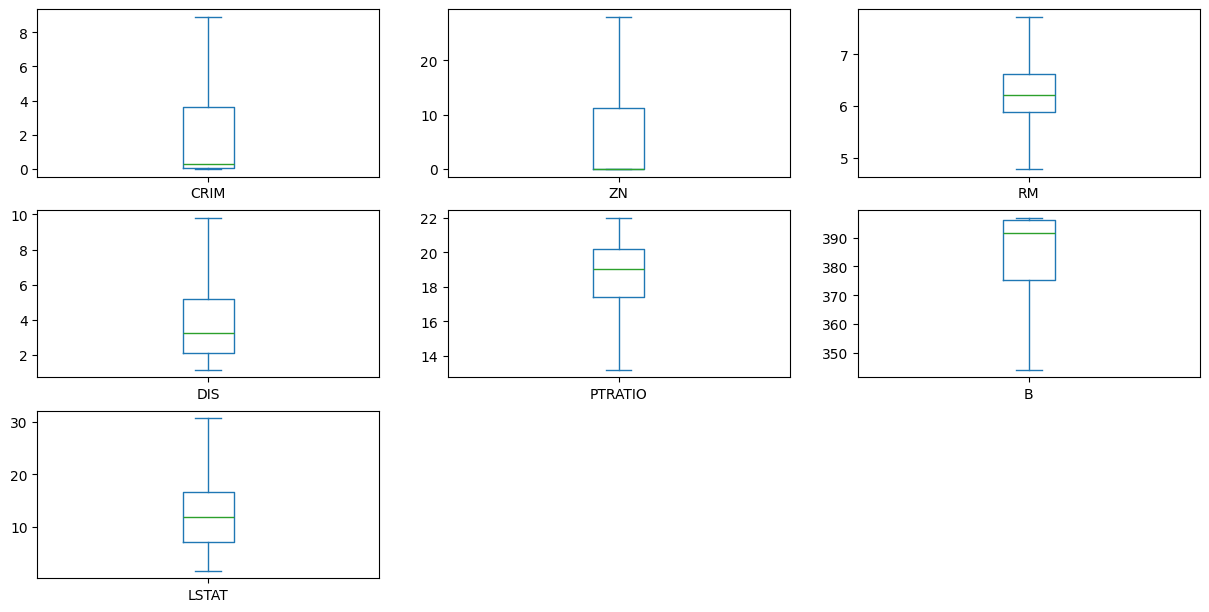

In [12]:
# Confirm outliers have been handled or not
df[numeric_cols].plot(kind='box', subplots=True, layout=(4,3), figsize=(15,10))
plt.show()

Outliers have been handled

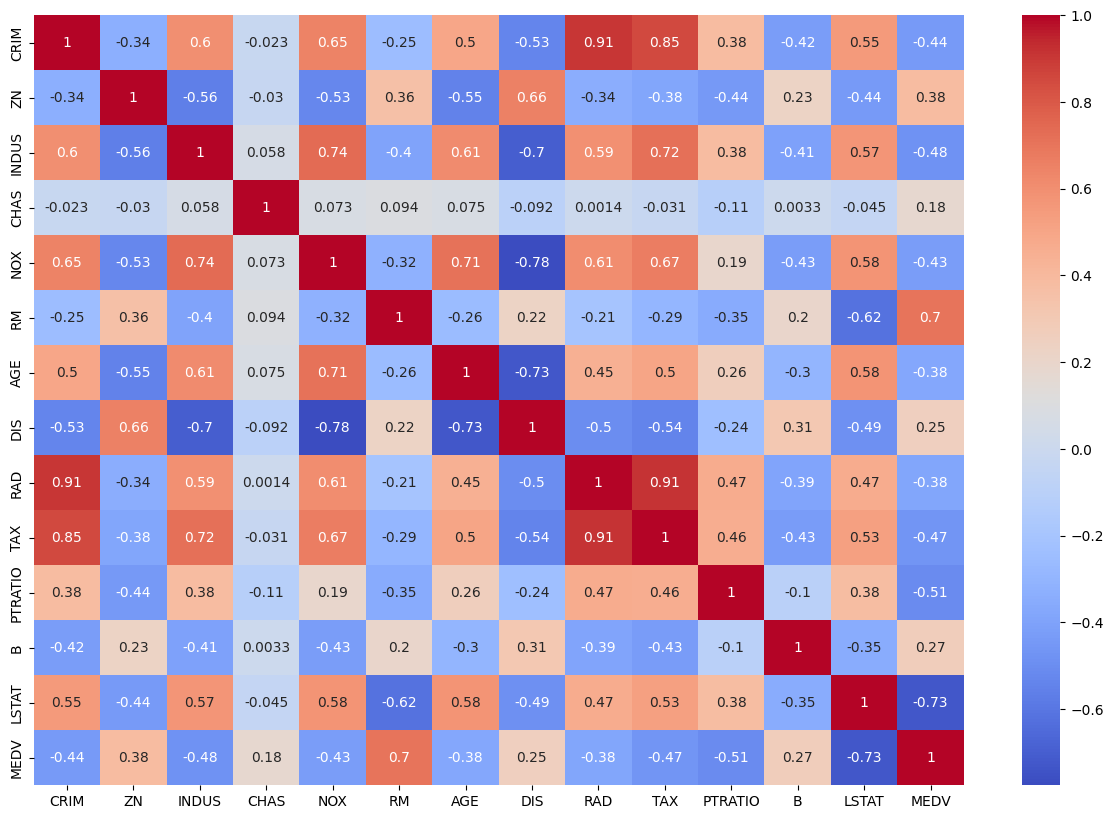

In [13]:
# Correlation Heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

**Correlation:** Correlation measures the relationship between variables. A high correlation coefficient (close to +1) indicates that as one variable increases, the other also increases. A high negative correlation (close to -1) means that as one variable increases, the other decreases.A correlation coefficient close to 0 suggests no linear relationship between the variables.

In [14]:
# Calculate correlations with the target column
correlations = df.corr()['MEDV'].drop('MEDV') # Drop target column to avoid self correlation calculation
print(correlations)

CRIM      -0.438567
ZN         0.383257
INDUS     -0.478657
CHAS       0.179882
NOX       -0.427321
RM         0.701725
AGE       -0.380223
DIS        0.253172
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507188
B          0.271067
LSTAT     -0.730838
Name: MEDV, dtype: float64


From the above calculated correlations, it can be seen that RAD, NOX, and AGE are weakly correlated

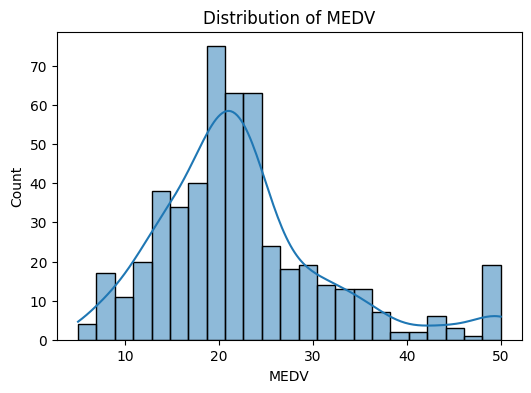

In [15]:
# Histogram of Target Variable
plt.figure(figsize=(6,4))
sns.histplot(df['MEDV'], kde=True)
plt.title('Distribution of MEDV')
plt.show()

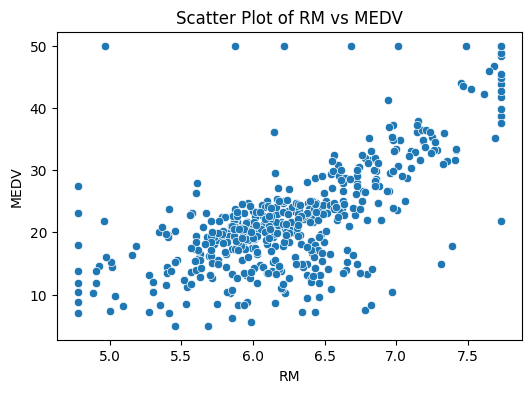

In [16]:
# Scatter Plot of Target Variable and RM
plt.figure(figsize=(6,4))
sns.scatterplot(x=df['RM'], y=df['MEDV'])
plt.title('Scatter Plot of RM vs MEDV')
plt.show()

---

### Feature Selection
Feature selection is the process of selecting the most relevant variables for model training, which enhances model accuracy and decreases overfitting by eliminating irrelevant or redundant features. 

We can select relevant features using correlation scores

In [17]:
# Feature Selection
columns_to_drop = ['RAD', 'NOX', 'AGE']
df = df.drop(columns=columns_to_drop)

---

### Model Building

In [18]:
# Input and Target
X = df.drop('MEDV', axis=1)
y = df['MEDV']

In [19]:
# Split to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 10), (102, 10), (404,), (102,))

**Standardization:** Standardization rescales data to have a mean of 0 and a standard deviation of 1, making it suitable for models sensitive to feature scaling.

In [20]:
# Standardize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Decision Tree

In [21]:
# Decision Tree Regressor

dt = DecisionTreeRegressor(random_state=42)

# Fit model on training set
dt.fit(X_train, y_train)

# Predict
y_pred_dt = dt.predict(X_test)

print('Decision Tree Regressor Metrics:')
print('MAE:', mean_absolute_error(y_test, y_pred_dt))
print('MSE:', mean_squared_error(y_test, y_pred_dt))
print('R2 Score:', r2_score(y_test, y_pred_dt))

Decision Tree Regressor Metrics:
MAE: 3.301960784313725
MSE: 23.832352941176467
R2 Score: 0.6750153624411552


In [22]:
# Cross-validation folds
kf = KFold(n_splits=5, shuffle=True, random_state=42)

#### Hyperparameter Tuning of Decision Tree

In [23]:
# # Hyperparameter grid
# param_grid = {
#     'max_depth': [None, 5, 10, 15, 20],
#     'min_samples_split': [2, 5, 10, 15, 20],
#     'min_samples_leaf': [1, 2, 5, 10, 15],
#     'max_features': [None, 'sqrt', 'log2', 0.5, 0.75],  
#     'splitter': ['best', 'random']
# }

# # Create the GridSearchCV object
# grid_search = GridSearchCV(
#     estimator=dt,
#     param_grid=param_grid,
#     cv=kf,       
#     scoring='neg_mean_squared_error',
#     n_jobs=-1,    # Use all available CPU cores
# )

# # Fit the GridSearchCV object to the training data
# grid_search.fit(X_train, y_train)

# print("Best Hyperparameters:", grid_search.best_params_)

# # Evaluate the best model on the test set
# best_model = grid_search.best_estimator_
# y_pred = best_model.predict(X_test)

# mse = mean_squared_error(y_test, y_pred)
# print("Mean Squared Error:", mse)

In [24]:
# Tuned Decision Tree
dt_tuned = DecisionTreeRegressor(max_depth=10, max_features=0.75, min_samples_leaf=2, min_samples_split=5, splitter='random', random_state=42)

# Fit on train data
dt_tuned.fit(X_train, y_train)

# Predict
y_pred_dt_tuned = dt_tuned.predict(X_test)

print('Decision Tree Regressor Metrics:')
print('MAE:', mean_absolute_error(y_test, y_pred_dt_tuned))
print('MSE:', mean_squared_error(y_test, y_pred_dt_tuned))
print('R2 Score:', r2_score(y_test, y_pred_dt_tuned))

Decision Tree Regressor Metrics:
MAE: 3.18791487079868
MSE: 25.948805729843812
R2 Score: 0.6461548196263882


Decision Tree metrics have decreased by applying hyperparameter tuning

#### Bagging Regressor

In [25]:
# Bagging RegressorRegardless of tuning, the Gradient Boosting Regressor is the most reliable model in terms of MAE, MSE, and R2 according to the comparison. Random Forest also performed quite well with relatively low values of MAE and MSE. Decision Tree, though sometimes improved with tuning, was not competitive compared to more complex models like Gradient Boosting and Random Forest. AdaBoost and Bagging Regressor displayed moderate results, with tuning not always leading to significant improvements.

bag = BaggingRegressor(estimator=DecisionTreeRegressor(random_state=42), random_state=42)

# Fit model on train data
bag.fit(X_train, y_train)

# Predict
y_pred_bag = bag.predict(X_test)

print('Bagging Regressor Metrics:')
print('MAE:', mean_absolute_error(y_test, y_pred_bag))
print('MSE:', mean_squared_error(y_test, y_pred_bag))
print('R2 Score:', r2_score(y_test, y_pred_bag))

Bagging Regressor Metrics:
MAE: 2.3257843137254905
MSE: 10.181051960784314
R2 Score: 0.8611683248561388


#### Hyperparameter Tuning of Bagging Regressor

In [26]:
# # Hyperparameter grid 
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_samples': [0.5, 0.7, 1.0],
#     'max_features': [0.5, 0.7, 1.0],
#     'bootstrap': [True, False],
#     'bootstrap_features': [True, False],
# }

# # Create the GridSearchCV object
# grid_search = GridSearchCV(estimator=bag,
#                           param_grid=param_grid,
#                           cv=kf,       
#                           scoring='neg_mean_squared_error',
#                           n_jobs=-1,    # Use all available CPU cores
# )

# # Fit the GridSearchCV object to the training data
# grid_search.fit(X_train, y_train)

# print("Best Hyperparameters:", grid_search.best_params_)

# # Evaluate the best model on the test set
# best_model = grid_search.best_estimator_
# y_pred = best_model.predict(X_test)

# mse = mean_squared_error(y_test, y_pred)
# print("Mean Squared Error:", mse)

In [27]:
# Tuned Bagging Regressor

bag_tuned = BaggingRegressor(n_estimators=100, max_samples=1.0, max_features=0.7, bootstrap=True, bootstrap_features=False, random_state=42)

# Fit on train data
bag_tuned.fit(X_train, y_train)

# Predict
y_pred_bag_tuned = bag_tuned.predict(X_test)

print('Bagging Regressor Metrics:')
print('MAE:', mean_absolute_error(y_test, y_pred_bag_tuned))
print('MSE:', mean_squared_error(y_test, y_pred_bag_tuned))
print('R2 Score:', r2_score(y_test, y_pred_bag_tuned))

Bagging Regressor Metrics:
MAE: 2.3721745098039206
MSE: 12.36802816666666
R2 Score: 0.8313461049782803


Bagging Regressor metrics have decreased by applying hyperparameter tuning

#### Random Forest

In [28]:
# Random Forest Regressor

rf = RandomForestRegressor(random_state=42)

# Fit model on train data
rf.fit(X_train, y_train)

# Predict
y_pred_rf = rf.predict(X_test)

print('Random Forest Regressor Metrics:')
print('MAE:', mean_absolute_error(y_test, y_pred_rf))
print('MSE:', mean_squared_error(y_test, y_pred_rf))
print('R2 Score:', r2_score(y_test, y_pred_rf))

Random Forest Regressor Metrics:
MAE: 2.25620588235294
MSE: 10.577428519607837
R2 Score: 0.8557632231180087


#### Hyperparameter Tuning of Random Forest

In [29]:
# # Hyperparameter grid
# param_grid = {
#     'max_depth': [None, 5, 10],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 5],
#     'max_features': [None, 'sqrt', 'log2', 0.5]
# }

# # Create the GridSearchCV object
# grid_search = GridSearchCV(
#     estimator=rf,
#     param_grid=param_grid,
#     cv=kf,       
#     scoring='neg_mean_squared_error',
#     n_jobs=-1,    # Use all available CPU cores
  
# )

# # Fit the GridSearchCV object to the training data
# grid_search.fit(X_train, y_train)

# print("Best Hyperparameters:", grid_search.best_params_)

# # Evaluate the best model on the test set
# best_model = grid_search.best_estimator_
# y_pred = best_model.predict(X_test)

# mse = mean_squared_error(y_test, y_pred)
# print("Mean Squared Error:", mse)

In [30]:
# Tuned Random Forest
rf_tuned = RandomForestRegressor(max_depth=None, max_features=0.5, min_samples_leaf=1, min_samples_split=2, random_state=42)

# Fit on train data
rf_tuned.fit(X_train, y_train)

# Predict
y_pred_rf_tuned = rf_tuned.predict(X_test)

print('Random Forest Regressor Metrics:')
print('MAE:', mean_absolute_error(y_test, y_pred_rf_tuned))
print('MSE:', mean_squared_error(y_test, y_pred_rf_tuned))
print('R2 Score:', r2_score(y_test, y_pred_rf_tuned))

Random Forest Regressor Metrics:
MAE: 2.241578431372549
MSE: 11.35351767647058
R2 Score: 0.8451802540767681


Random Forest Regressor metrics have decreased by applying hyperparameter tuning

#### Gradient Boosting Regressor

In [31]:
# Gradient Boosting Regressor
gb = GradientBoostingRegressor(random_state=42)

# Fit on train data
gb.fit(X_train, y_train)

# Predict
y_pred_gb = gb.predict(X_test)

print('Gradient Boosting Regressor Metrics:')
print('MAE:', mean_absolute_error(y_test, y_pred_gb))
print('MSE:', mean_squared_error(y_test, y_pred_gb))
print('R2 Score:', r2_score(y_test, y_pred_gb))

Gradient Boosting Regressor Metrics:
MAE: 2.135422696611644
MSE: 8.811839123965955
R2 Score: 0.8798392944667612


#### Hyperparameter Tuning of Gradient Boosting Regressor

In [32]:
# # Hyperparameter grid
# param_grid = {
#     'n_estimators': [50, 100, 200],  
#     'learning_rate': [0.01, 0.05, 0.1],  # Step size shrinking to prevent overfitting
#     'max_depth': [3, 5, 7],  
#     'min_samples_split': [2, 5, 10]  
# }

# # Create the GridSearchCV object
# grid_search = GridSearchCV(estimator=gb,
#                           param_grid=param_grid,
#                           cv=5,             
#                           scoring='neg_mean_squared_error',  
#                           n_jobs=-1,         # Use all available CPU cores
# )

# # Fit the GridSearchCV object to the training data
# grid_search.fit(X_train, y_train)

# print("Best Hyperparameters:", grid_search.best_params_)

# # Evaluate the best model on the test set
# best_model = grid_search.best_estimator_
# y_pred = best_model.predict(X_test)

# mse = mean_squared_error(y_test, y_pred)
# print("Mean Squared Error:", mse)

In [33]:
# Tuned Gradient Boosting REgressor
gb_tuned = GradientBoostingRegressor(n_estimators=100, learning_rate=0.05, max_depth=3, min_samples_split=5, random_state=42)

# Fit on train data
gb_tuned.fit(X_train, y_train)

# Predict
y_pred_gb_tuned = gb_tuned.predict(X_test)

print('Gradient Boosting Regressor Metrics:')
print('MAE:', mean_absolute_error(y_test, y_pred_gb_tuned))
print('MSE:', mean_squared_error(y_test, y_pred_gb_tuned))
print('R2 Score:', r2_score(y_test, y_pred_gb_tuned))

Gradient Boosting Regressor Metrics:
MAE: 2.222410236551082
MSE: 9.67524149743141
R2 Score: 0.8680656979569796


Gradient Boosting Regressor metrics have decreased by applying hyperparameter tuning

#### Adaboost Regressor

In [34]:
# Adaboost Regressor
ab = AdaBoostRegressor(random_state=42)

# Fit on train data
ab.fit(X_train, y_train)

# Predict
y_pred_ab = ab.predict(X_test)

print('Adaboost Regressor Metrics:')
print('MAE:', mean_absolute_error(y_test, y_pred_ab))
print('MSE:', mean_squared_error(y_test, y_pred_ab))
print('R2 Score:', r2_score(y_test, y_pred_ab))

Adaboost Regressor Metrics:
MAE: 2.444518450247568
MSE: 12.780388667129298
R2 Score: 0.8257230417365936


#### Hyperparameter Tuning of Adaboost Regressor

In [35]:
# # Hyperparameter grid
# param_grid = {
#     'n_estimators': [50, 100, 200],  
#     'learning_rate': [0.01, 0.05, 0.1, 0.5],  
#     'loss': ['linear', 'square', 'exponential'],  
# }

# # Create the GridSearchCV object
# grid_search = GridSearchCV(estimator=ab,
#                           param_grid=param_grid,
#                           cv=5,              
#                           scoring='neg_mean_squared_error', 
#                           n_jobs=-1,         # Use all available CPU cores      
# )

# # Fit the GridSearchCV object to the training data
# grid_search.fit(X_train, y_train)

# print("Best Hyperparameters:", grid_search.best_params_)

# # Evaluate the best model on the test set
# best_model = grid_search.best_estimator_
# y_pred = best_model.predict(X_test)

# mse = mean_squared_error(y_test, y_pred)
# print("Mean Squared Error:", mse)

In [36]:
# Tuned AdaBoost Regressor
ab_tuned = AdaBoostRegressor(n_estimators=200, learning_rate=0.05, loss='exponential', random_state=42)

# Fit on Train Data
ab_tuned.fit(X_train, y_train)

# Predict
y_pred_ab_tuned = ab_tuned.predict(X_test)

print('Adaboost Regressor Metrics:')
print('MAE:', mean_absolute_error(y_test, y_pred_ab_tuned))
print('MSE:', mean_squared_error(y_test, y_pred_ab_tuned))
print('R2 Score:', r2_score(y_test, y_pred_ab_tuned))

Adaboost Regressor Metrics:
MAE: 2.4950245371157576
MSE: 10.84402247392064
R2 Score: 0.8521278733129949


AdaBoost Regressor metrics have increased by applying hyperparameter tuning

---

#### Evaluation Metrics plot

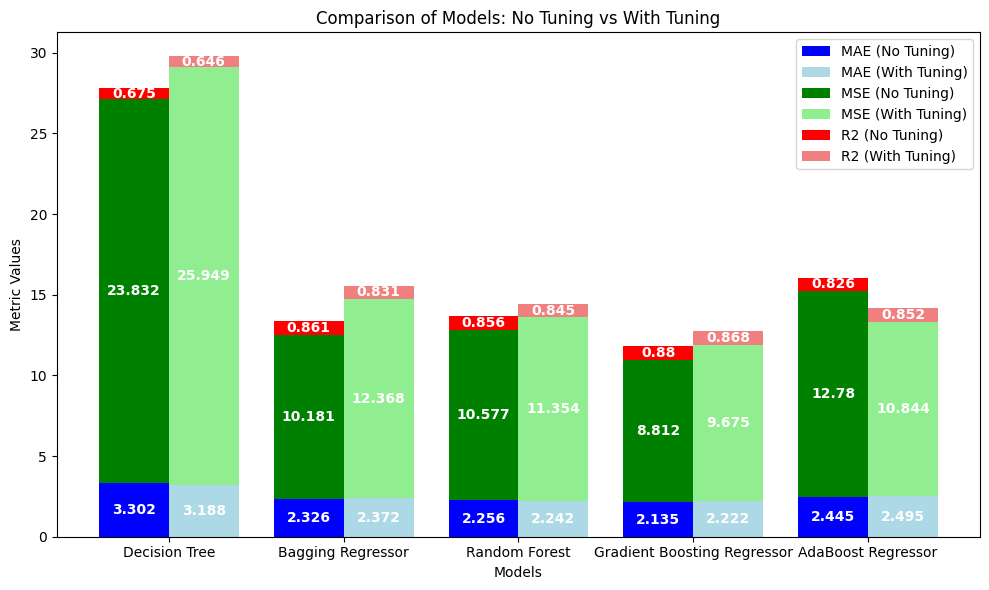

In [37]:
# Define the models and metrics with values rounded to three decimal places
models = ['Decision Tree', 'Bagging Regressor', 'Random Forest', 'Gradient Boosting Regressor', 'AdaBoost Regressor'] 

metrics_no_tuning = {
    'MAE': [round(3.301960784313725, 3), round(2.3257843137254905, 3), round(2.25620588235294, 3), round(2.135422696611644, 3), round(2.444518450247568, 3)],  
    'MSE': [round(23.832352941176467, 3), round(10.181051960784314, 3), round(10.577428519607837, 3), round(8.811839123965955, 3), round(12.780388667129298, 3)], 
    'R2': [round(0.6750153624411552, 3), round(0.8611683248561388, 3), round(0.8557632231180087, 3), round(0.8798392944667612, 3), round(0.8257230417365936, 3)]  
}

metrics_with_tuning = {
    'MAE': [round(3.18791487079868, 3), round(2.3721745098039206, 3), round(2.241578431372549, 3), round(2.222410236551082, 3), round(2.4950245371157576, 3)],  
    'MSE': [round(25.948805729843812, 3), round(12.36802816666666, 3), round(11.35351767647058, 3), round(9.67524149743141, 3), round(10.84402247392064, 3)],  
    'R2': [round(0.6461548196263882, 3), round(0.8313461049782803, 3), round(0.8451802540767681, 3), round(0.8680656979569796, 3), round(0.8521278733129949, 3)]  
}

# Create the bar plot
x = np.arange(len(models))  # X-axis positions for each model
width = 0.4  # Width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

# Plot the bars for each metric
bar1 = ax.bar(x - width/2, metrics_no_tuning['MAE'], width, label='MAE (No Tuning)', color='blue')
bar2 = ax.bar(x + width/2, metrics_with_tuning['MAE'], width, label='MAE (With Tuning)', color='lightblue')

bar3 = ax.bar(x - width/2, metrics_no_tuning['MSE'], width, label='MSE (No Tuning)', color='green', bottom=metrics_no_tuning['MAE'])
bar4 = ax.bar(x + width/2, metrics_with_tuning['MSE'], width, label='MSE (With Tuning)', color='lightgreen', bottom=metrics_with_tuning['MAE'])

bar5 = ax.bar(x - width/2, metrics_no_tuning['R2'], width, label='R2 (No Tuning)', color='red', bottom=np.array(metrics_no_tuning['MAE']) + np.array(metrics_no_tuning['MSE']))
bar6 = ax.bar(x + width/2, metrics_with_tuning['R2'], width, label='R2 (With Tuning)', color='lightcoral', bottom=np.array(metrics_with_tuning['MAE']) + np.array(metrics_with_tuning['MSE']))

# Annotate the bars with their respective values
for i in range(len(models)):
    ax.text(bar1[i].get_x() + bar1[i].get_width() / 2, bar1[i].get_height() / 2, str(metrics_no_tuning['MAE'][i]), 
            ha='center', va='center', color='white', fontweight='bold')
    ax.text(bar2[i].get_x() + bar2[i].get_width() / 2, bar2[i].get_height() / 2, str(metrics_with_tuning['MAE'][i]), 
            ha='center', va='center', color='white', fontweight='bold')

    ax.text(bar3[i].get_x() + bar3[i].get_width() / 2, bar3[i].get_height() / 2 + metrics_no_tuning['MAE'][i], 
            str(metrics_no_tuning['MSE'][i]), ha='center', va='center', color='white', fontweight='bold')
    ax.text(bar4[i].get_x() + bar4[i].get_width() / 2, bar4[i].get_height() / 2 + metrics_with_tuning['MAE'][i], 
            str(metrics_with_tuning['MSE'][i]), ha='center', va='center', color='white', fontweight='bold')

    ax.text(bar5[i].get_x() + bar5[i].get_width() / 2, bar5[i].get_height() / 2 + metrics_no_tuning['MAE'][i] + metrics_no_tuning['MSE'][i], 
            str(metrics_no_tuning['R2'][i]), ha='center', va='center', color='white', fontweight='bold')
    ax.text(bar6[i].get_x() + bar6[i].get_width() / 2, bar6[i].get_height() / 2 + metrics_with_tuning['MAE'][i] + metrics_with_tuning['MSE'][i], 
            str(metrics_with_tuning['R2'][i]), ha='center', va='center', color='white', fontweight='bold')

# Plot
ax.set_xlabel('Models')
ax.set_ylabel('Metric Values')
ax.set_title('Comparison of Models: No Tuning vs With Tuning')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

plt.tight_layout()
plt.show()


---

### Model Performance Comparison: Tuning vs. No Tuning

To compare the performance of different regression models, I utilized three main metrics: Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R2). The results from Decision Tree, Bagging Regressor, Random Forest, Gradient Boosting Regressor, and AdaBoost Regressor give a good understanding of how they work.

**Mean Absolute Error:** The MAE values are used to determine the accuracy of the models in terms of average absolute error. Here, Random Forest and Gradient Boosting Regressor proved their worth by showing MAE values of 2.256 and 2.135, respectively, which indicate smaller errors than other models. While tuning did lead to better performance for most models, the Decision Tree exhibited a very significant drop in MAE after tuning, from 3.302 to 3.188, yet it still had the highest error compared to other models.

**Mean Squared Error:** On considering MSE that penalizes the large errors more heavily, the Gradient Boosting Regressor performed better, achieving an MSE of 8.812 with no tuning, which increases with tuning to 9.675. AdaBoost Regressor shows improvement in terms of tuning but the error level remains more prominent in comparison to the other models such as Random Forest and Gradient Boosting. Interestingly, the Decision Tree increased MSE after tuning. This indicates that tuning is not always beneficial for less complex models.

**R-Squared:** The R-squared metric, which reflects the proportion of variance explained by the model, indicated that the Gradient Boosting Regressor without tuning had the highest R² (0.880). Even with tuning, the model led with an R² of 0.868, confirming its robustness. However, models such as the Bagging Regressor and AdaBoost Regressor showed strong R² scores even without tuning, at 0.861 and 0.826, respectively. Tuning did not yield good results; instead, it decreased the performance of all models except AdaBoost.

### Conclusion:

Regardless of tuning, the Gradient Boosting Regressor is the most reliable model for housing price prediction in terms of MAE, MSE, and R2 according to the comparison. Random Forest and Bagging Regressor also performed quite well with relatively low values of MAE and MSE. In Decision Tree, though MAE improved with tuning, but it was not competitive compared to more complex models like Gradient Boosting and Random Forest. AdaBoost displayed moderate results, with tuning not always leading to significant improvements.

---